<a href="https://colab.research.google.com/github/AnirudhPhophalia/MNIST_COMPLTE_ANALYSIS/blob/main/MNIST_complete_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the dependecies

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

Laoding and normalizing the datasets

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Building basic model and then compling

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the compiled model and then finally evaluating

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8843 - loss: 0.4188
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9647 - loss: 0.1181
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9759 - loss: 0.0788
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9833 - loss: 0.0562
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9874 - loss: 0.0417


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.0915
Test Accuracy: 0.9751999974250793


YAy, we got an accuracy of 97.51 %

Now lets visualize the predictions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


heer is a function whichplot the images wrt there prediction blue labeled as correct prediction and red as incorrect

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    predicted_label = np.argmax(predictions_array)
    true_label = true_label[i]
    img = img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    color = "blue" if predicted_label == true_label else "red"
    plt.xlabel(f"Pred: {predicted_label} ({100*np.max(predictions_array):.1f}%)\nTrue: {true_label}", color=color)


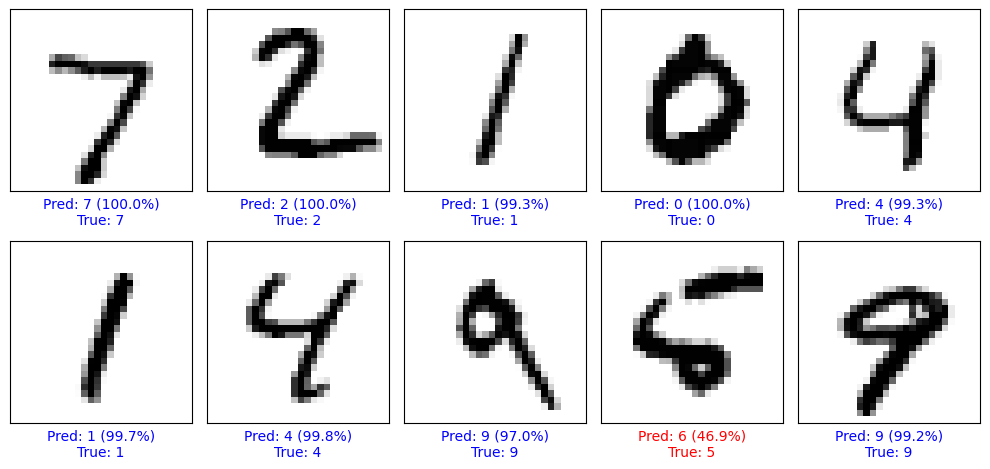

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()

we can see from above the number 5 prediction us incorrect rest all are correct with accuract of more than 99percent.

Now lets find why there is error by plotting a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y_pred = np.argmax(predictions, axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

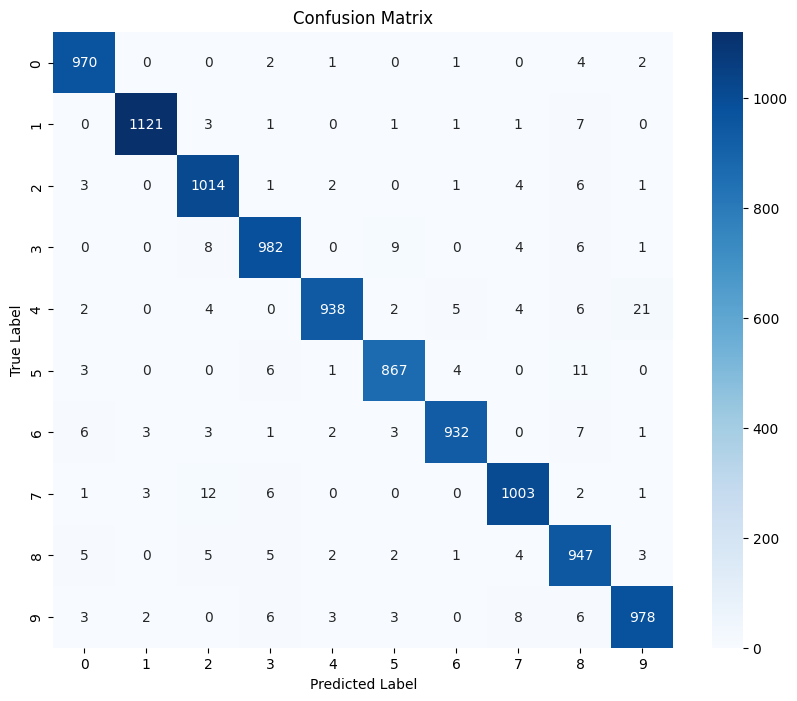

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

from the confusion matrix we can se that

Digit 5 is mostly confused with: 6 (11 times) and 8 (11 times)

Digit 4 is mostly confused with: 9 (21 times)

now i think so for better accuray we should do dropout and regularizationa lso. so lets do it

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),

    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),  # L2

    layers.Dropout(0.3),  # Dropout: 30% neurons off during training

    layers.Dense(64, activation='relu'),

    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7927 - loss: 0.7938 - val_accuracy: 0.9526 - val_loss: 0.2622
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9317 - loss: 0.3239 - val_accuracy: 0.9602 - val_loss: 0.2226
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9394 - loss: 0.2919 - val_accuracy: 0.9661 - val_loss: 0.2117
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9458 - loss: 0.2719 - val_accuracy: 0.9639 - val_loss: 0.2137
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9509 - loss: 0.2568 - val_accuracy: 0.9683 - val_loss: 0.2005


oh oh

what we saw is that the acuracy decreases due to drip out, hence we can understand that we should not use dropout for our datset

So to improve our accuracy we should try the CNN technique, so lets do it


In [ ]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 31ms/step - accuracy: 0.8689 - loss: 0.4253 - val_accuracy: 0.9835 - val_loss: 0.0546
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9740 - loss: 0.0856 - val_accuracy: 0.9870 - val_loss: 0.0432
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.9825 - loss: 0.0564 - val_accuracy: 0.9897 - val_loss: 0.0356
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 32ms/step - accuracy: 0.9869 - loss: 0.0445 - val_accuracy: 0.9908 - val_loss: 0.0343
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.9872 - loss: 0.0395 - val_accuracy: 0.9905 - val_loss: 0.0346


In [ ]:
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9856 - loss: 0.0466
CNN Test Accuracy: 0.9890000224113464


oh
see our accuracy jumped a vast from 97.51 to 98.99, that is a huge increament and also agreat advancement of our model

lets now add more data to our dateset





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Create data augmenter
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit generator on training data
datagen.fit(x_train_cnn)

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_model.fit(datagen.flow(x_train_cnn, y_train, batch_size=32),
              validation_data=(x_test_cnn, y_test),
              epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.8050 - loss: 0.6147 - val_accuracy: 0.9816 - val_loss: 0.0619
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9566 - loss: 0.1406 - val_accuracy: 0.9868 - val_loss: 0.0410
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9690 - loss: 0.1058 - val_accuracy: 0.9881 - val_loss: 0.0344
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9738 - loss: 0.0861 - val_accuracy: 0.9907 - val_loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9769 - loss: 0.0749 - val_accuracy: 0.9915 - val_loss: 0.0290


In [ ]:
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy with increased datset:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9907 - loss: 0.0322
CNN Test Accuracy with increased datset: 0.9915000200271606


Oh see on icreasing the dtaest our accuracy incresed from 98.99 to 99.15.

that s great.
